In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
df= pd.read_csv("final_df.csv")

In [3]:
df.head()

,polarity,words,Fri,Mon,Sat,Sun,Thu,Tue,Wed,h_00,...,h_14,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23
0,0,"{'awww': 1, 'bummer': 1, 'shoulda': 1, 'david'...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,"{'upset': 1, 'notupdate': 1, 'facebook': 1, 't...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,"{'dive': 1, 'many': 1, 'time': 1, 'ball': 1, '...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,"{'whole': 1, 'body': 1, 'feel': 1, 'itchy': 1,...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,"{'mad': 1, 'notsee': 1}",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
# Renaming all features to be of capital letters or containing number like h_00
# That will help us when converting the dict of words to frequency encoding in order not to have any word
# that already existed in the previous features. (We are sure as our words are small and don't contain numbers)
df.rename(columns={"polarity":"Polarity", "words":"Words"}, inplace=True)

In [5]:
# Using 8 bits instead of 64 bits
for col in df.columns:
    if col!='Words':
        df[col] = df[col].astype(np.int8)

In [6]:
# Converting string dictionary to python dictionary
import ast

df['Words'] = df['Words'].apply(lambda x: ast.literal_eval(x))

## Sampling

In [7]:
# We have nearly 50-50 
df['Fri'].value_counts()

0    1285683
1     210655
Name: Fri, dtype: int64

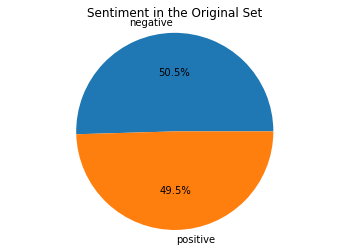

In [8]:
# Distribution of polarity Before Sampling
counts_polarity= df['Polarity'].value_counts()
plt.pie(x=[counts_polarity[0], counts_polarity[1]],labels=['negative', 'positive'],autopct='%1.1f%%')
plt.title('Sentiment in the Original Set')
plt.axis('equal')
plt.show()

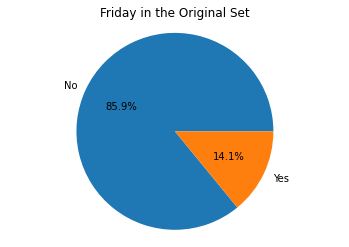

In [9]:
# Distribtuion of froiday feature before sampling 
counts_friday= df['Fri'].value_counts()
plt.pie(x=[counts_friday[0], counts_friday[1]],labels=['No', 'Yes'],autopct='%1.1f%%')
plt.title('Friday in the Original Set')
plt.axis('equal')
plt.show()

In [10]:
sample = df.sample(frac = 0.10, random_state=1)
sample.reset_index(drop=True, inplace=True)

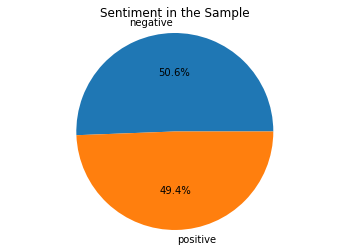

In [11]:
# Distribution of polarity After Sampling
counts_polarity_s= sample['Polarity'].value_counts()
plt.pie(x=[counts_polarity_s[0], counts_polarity_s[1]],labels=['negative', 'positive'],autopct='%1.1f%%')
plt.title('Sentiment in the Sample')
plt.axis('equal')
plt.show()

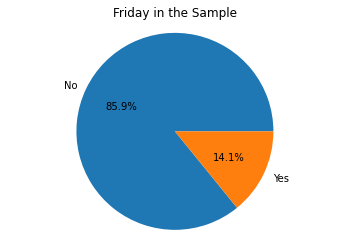

In [12]:
# Distribtuion of froiday feature before sampling 
counts_friday_s= sample['Fri'].value_counts()
plt.pie(x=[counts_friday_s[0], counts_friday_s[1]],labels=['No', 'Yes'],autopct='%1.1f%%')
plt.title('Friday in the Sample')
plt.axis('equal')
plt.show()

In [13]:
for i in range(len(sample)):
    word_dict = sample['Words'][i]
    for word, freq in word_dict.items():
        if word in sample.columns:
            sample[word][i] += freq
        else:
            sample[word] = 0
            sample[word]= sample[word].astype(np.int8)
            sample[word][i] += freq
            

<ipython-input-13-3f638306db29>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample[word][i] += freq
<ipython-input-13-3f638306db29>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample[word][i] += freq


In [14]:
# start time: 9:08
# end time 9:20
# for 1.5 M this will take around 120 min (2h)
# consider for key, value in .items():

In [15]:
sample.drop(columns=['index'], inplace=True)

In [16]:
sample

,Polarity,Words,Fri,Mon,Sat,Sun,Thu,Tue,Wed,h_00,...,inn,trippin,rental,pixel,hurrah,supposedly,stoopid,eleven,puff,essential
0,0,"{'omg': 1, 'one': 1, 'year': 1, 'work': 1, 'pe...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"{'meantime': 1, 'revision': 1, 'whilst': 1, 'l...",0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,"{'pierce': 1, 'fail': 1, 'time': 1, 'fuck': 1}",0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,"{'win': 1, 'award': 1, 'play': 1, 'tennis': 1}",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,"{'want': 1, 'back': 1, 'bed': 1, 'notwait': 1,...",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149629,1,"{'miss': 1, 'rachel': 1, 'ray': 1, 'eye': 1, '...",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149630,0,"{'miss': 1, 'twitter': 1, 'gossip': 1}",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149631,0,"{'think': 1, 'little': 1, 'girl': 1, 'today': ...",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149632,0,"{'nose': 1, 'freeze': 1, 'turn': 1, 'hurt': 1,...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
sample.drop(columns=['Words'], inplace = True)

In [18]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149634 entries, 0 to 149633
Columns: 6870 entries, Polarity to essential
dtypes: int8(6870)
memory usage: 980.4 MB


In [19]:
X = sample.iloc[:,1:]
y = sample.iloc[:,0]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_test

,Fri,Mon,Sat,Sun,Thu,Tue,Wed,h_00,h_01,h_02,...,inn,trippin,rental,pixel,hurrah,supposedly,stoopid,eleven,puff,essential
101847,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68123,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130461,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97279,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
54276,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91409,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52102,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110565,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y_test

101847    0
68123     0
130461    0
97279     0
54276     0
         ..
91409     1
52102     1
110565    0
12292     0
90786     0
Name: Polarity, Length: 29927, dtype: int8

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
LR_pred = LR_clf.predict(X_test)

In [24]:
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78     15129
           1       0.76      0.80      0.78     14798

    accuracy                           0.78     29927
   macro avg       0.78      0.78      0.78     29927
weighted avg       0.78      0.78      0.78     29927



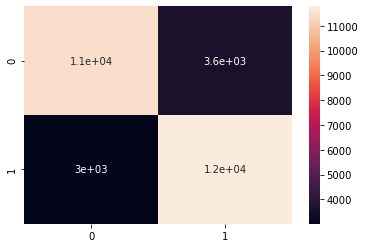

In [25]:
LR_cf_matrix = confusion_matrix(y_test, LR_pred)
sns.heatmap(LR_cf_matrix, annot=True);

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
DT_pred = DT_clf.predict(X_test)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70     15129
           1       0.69      0.70      0.69     14798

    accuracy                           0.69     29927
   macro avg       0.69      0.69      0.69     29927
weighted avg       0.69      0.69      0.69     29927



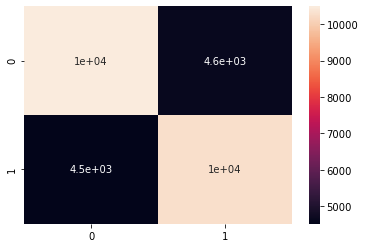

In [28]:
DT_cf_matrix = confusion_matrix(y_test, DT_pred)
sns.heatmap(DT_cf_matrix, annot=True);

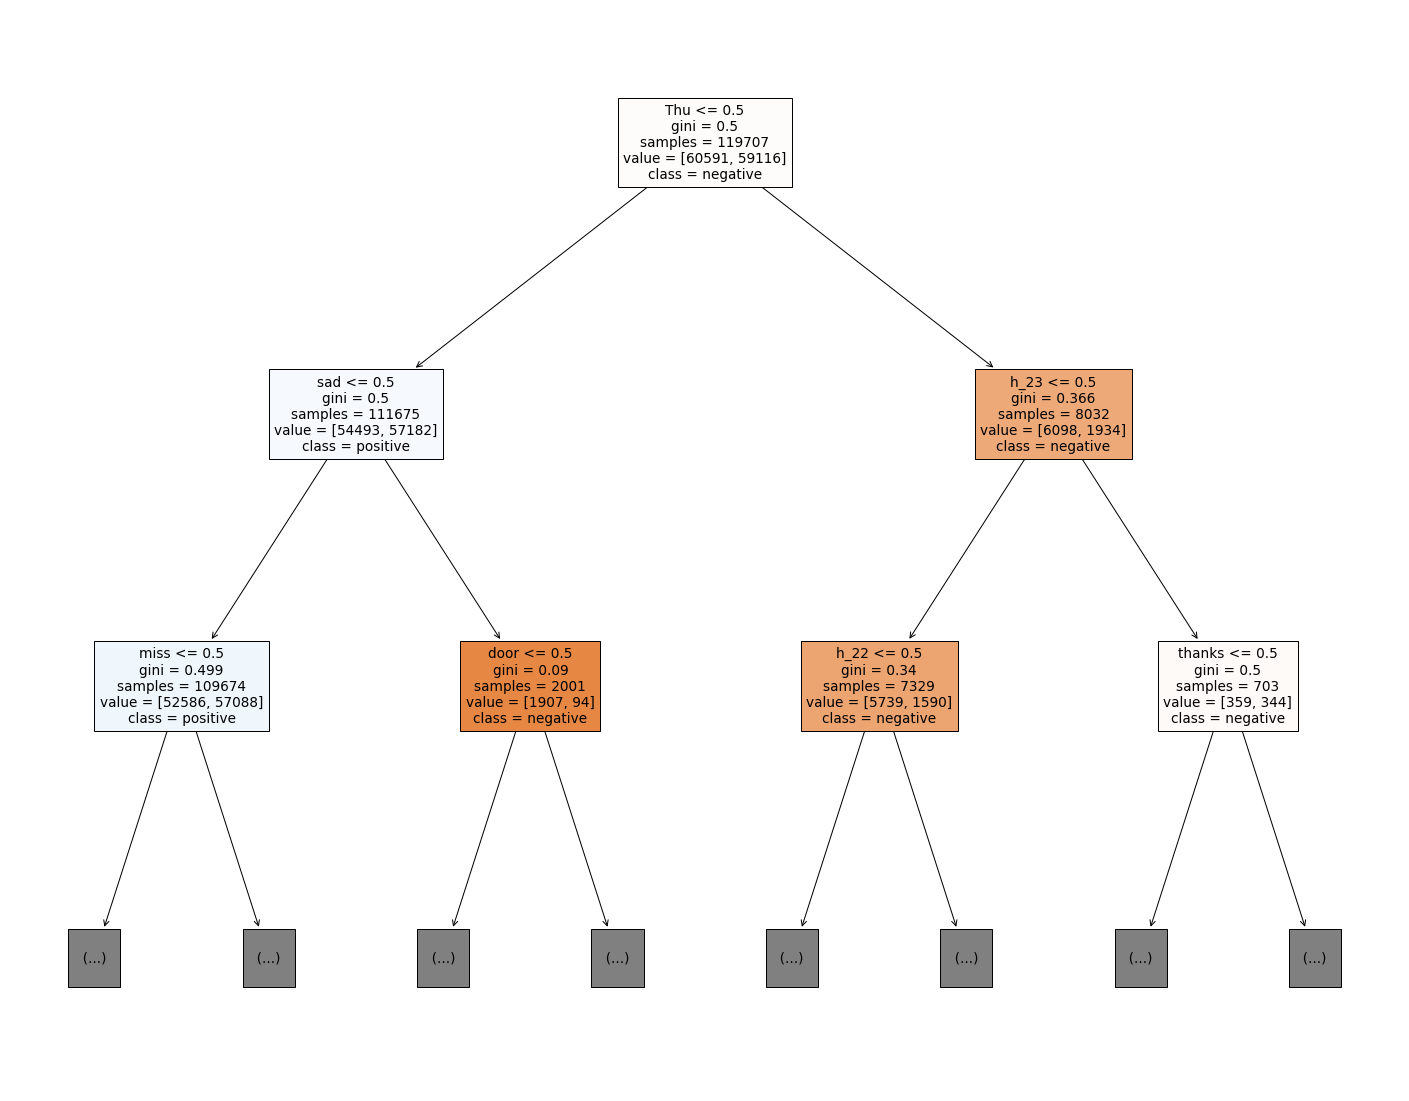

In [29]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
plot_tree(DT_clf, max_depth=2, feature_names=X_test.columns, class_names=["negative", "positive"], filled=True);

## Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB
NV_clf = MultinomialNB().fit(X_train, y_train)
NV_pred = NV_clf.predict(X_test)

In [31]:
print(classification_report(y_test, NV_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78     15129
           1       0.77      0.77      0.77     14798

    accuracy                           0.77     29927
   macro avg       0.77      0.77      0.77     29927
weighted avg       0.77      0.77      0.77     29927



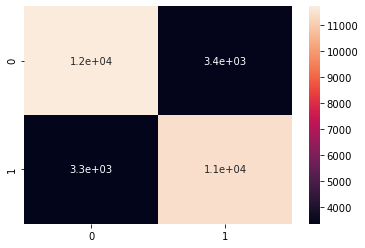

In [32]:
NV_cf_matrix = confusion_matrix(y_test, NV_pred)
sns.heatmap(NV_cf_matrix, annot=True);

In [33]:
proba_fatures_given_labels = np.exp(NV_clf.feature_log_prob_)
proba_fatures_given_labels = proba_fatures_given_labels.transpose()
proba_fatures_given_labels

array([[1.76253564e-02, 1.75291815e-02],
       [2.07473184e-02, 2.78400881e-02],
       [2.42699490e-02, 2.75583577e-02],
       ...,
       [4.06770285e-06, 6.40296415e-06],
       [8.13540569e-06, 1.92088924e-05],
       [4.06770285e-06, 1.06716069e-05]])

In [34]:
proba_df = pd.DataFrame(proba_fatures_given_labels, columns = ['negative', 'positive'] , index = X_train.columns)

#### Probability of features given label sorted according to negative label

In [35]:
proba_df.sort_values(by=['negative'], ascending=False).head(50)

,negative,positive
Sat,0.024270,0.027558
Sun,0.022265,0.031078
Mon,0.020747,0.027840
Fri,0.017625,0.017529
Tue,0.015510,0.013730
Thu,0.012404,0.004130
Wed,0.010426,0.004322
work,0.008135,0.004538
miss,0.007261,0.001596
want,0.006700,0.003244


#### Probability of features given label sorted according to negative label

In [36]:
proba_df.sort_values(by=['positive'], ascending=False).head(50)

,negative,positive
Sun,0.022265,0.031078
Mon,0.020747,0.027840
Sat,0.024270,0.027558
Fri,0.017625,0.017529
Tue,0.015510,0.013730
good,0.003714,0.009876
love,0.003228,0.009455
quot,0.004110,0.007878
h_00,0.005365,0.007156
h_01,0.004767,0.007037


In [37]:
sample

,Polarity,Fri,Mon,Sat,Sun,Thu,Tue,Wed,h_00,h_01,...,inn,trippin,rental,pixel,hurrah,supposedly,stoopid,eleven,puff,essential
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149629,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149630,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149631,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149632,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
sample.to_csv("sampleWithFrequencies.csv", index=False)

## Normal Neural Network

A neural network that stops when it does either 30 iteration or when the tolerance error is less than 1e-5. 
There is no validation set used

In [39]:
from sklearn.neural_network import MLPClassifier
NN_clf = MLPClassifier(random_state=1, max_iter=30, hidden_layer_sizes=(16,16), tol=1e-5, early_stopping=False, learning_rate_init=0.01)
NN_clf.fit(X_train, y_train)
NN_pred = NN_clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
print(classification_report(y_test, NN_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74     15129
           1       0.74      0.71      0.72     14798

    accuracy                           0.73     29927
   macro avg       0.73      0.73      0.73     29927
weighted avg       0.73      0.73      0.73     29927



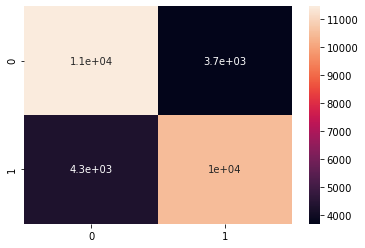

In [41]:
NN_cf_matrix = confusion_matrix(y_test, NN_pred)
sns.heatmap(NN_cf_matrix, annot=True);

In [42]:
print("The number of iterations done is ", NN_clf.n_iter_)

The number of iterations done is  30


## Neural Network with validation set

This Neural network uses 10% of the traning data as validation set, and it terminates the trainging when validation score is not improving by at least 
1e-5 for 10 consecutive iterations

In [43]:
NN_clf_stop = MLPClassifier(random_state=1, max_iter=30, hidden_layer_sizes=(16,16), tol=1e-5, early_stopping=True, learning_rate_init=0.01)
NN_clf_stop.fit(X_train, y_train)
NN_pred_stop = NN_clf_stop.predict(X_test)

In [44]:
print(classification_report(y_test, NN_pred_stop))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     15129
           1       0.77      0.79      0.78     14798

    accuracy                           0.78     29927
   macro avg       0.78      0.78      0.78     29927
weighted avg       0.78      0.78      0.78     29927



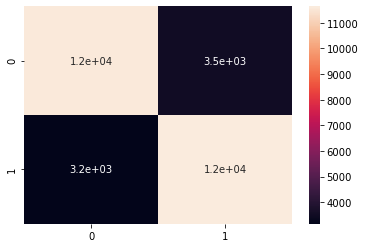

In [45]:
NN_cf_matrix_stop = confusion_matrix(y_test, NN_pred_stop)
sns.heatmap(NN_cf_matrix_stop, annot=True);

In [46]:
print("The number of iterations done is ", NN_clf_stop.n_iter_)

The number of iterations done is  12


## Stochastic Gradient Descent Linear SVM 

In [47]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [48]:
SGD_SVM_clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=500, tol=1e-3))

In [49]:
SGD_SVM_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(max_iter=500))])

In [50]:
SGD_SVM_pred = SGD_SVM_clf.predict(X_test)

In [51]:
print(classification_report(y_test, SGD_SVM_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75     15129
           1       0.74      0.75      0.75     14798

    accuracy                           0.75     29927
   macro avg       0.75      0.75      0.75     29927
weighted avg       0.75      0.75      0.75     29927



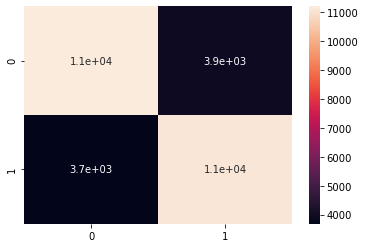

In [52]:
SGD_SVM_cf_matrix = confusion_matrix(y_test, SGD_SVM_pred)
sns.heatmap(SGD_SVM_cf_matrix, annot=True);